In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [5]:
cd/MajorProject/Data/Train

f:\MajorProject\Data\Train


In [6]:
os.getcwd()

'f:\\MajorProject\\Data\\Train'

In [7]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
data[0]

array([[[ 80,  78,  75],
        [ 80,  78,  75],
        [ 78,  76,  74],
        ...,
        [ 75,  75,  68],
        [ 68,  69,  65],
        [ 66,  67,  66]],

       [[ 86,  84,  83],
        [ 86,  84,  83],
        [ 82,  80,  80],
        ...,
        [ 78,  77,  73],
        [ 75,  78,  76],
        [ 78,  80,  80]],

       [[ 80,  78,  78],
        [ 80,  78,  78],
        [ 86,  85,  86],
        ...,
        [ 72,  74,  72],
        [ 69,  74,  73],
        [ 74,  78,  78]],

       ...,

       [[139, 134, 133],
        [139, 134, 133],
        [132, 127, 122],
        ...,
        [ 89,  94,  94],
        [ 91,  98,  97],
        [ 99, 103,  99]],

       [[ 99,  95,  91],
        [ 99,  95,  91],
        [103,  98,  91],
        ...,
        [ 95, 101, 103],
        [104, 113, 110],
        [ 98, 104,  96]],

       [[ 87,  84,  85],
        [ 87,  84,  85],
        [107, 101,  95],
        ...,
        [ 95, 102, 102],
        [ 90, 102,  99],
        [ 89,  97,  90]]

In [9]:
data_flatten = data.reshape(data.shape[0],-1)

In [10]:
data_flatten[0]

array([80, 78, 75, ..., 89, 97, 90], dtype=uint8)

In [22]:
labels.shape

(39209,)

In [62]:
labels

array(['0', '0', '0', ..., '9', '9', '9'], dtype='<U2')

In [12]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data_flatten,labels, test_size=0.2)
print(y_train.shape)
print(y_test.shape)



(31367,)
(7842,)


In [81]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(31367,)
(7842,)
(31367, 2700)
(7842, 2700)


In [82]:
X_train

array([[ 33,  33,  32, ...,  32,  33,  35],
       [ 22,  18,  16, ...,  12,  10,  11],
       [ 70,  45,  28, ...,  22,  21,  21],
       ...,
       [ 17,  13,  13, ...,  33,  26,  22],
       [ 25,  24,  23, ...,  17,  14,  15],
       [ 28,  57,  87, ..., 216, 233, 251]], dtype=uint8)

In [83]:
from sklearn import preprocessing
scaler =  preprocessing.StandardScaler().fit(X_train)
scaler_test =  preprocessing.StandardScaler().fit(X_test)
print(scaler)


StandardScaler()


In [84]:
print(scaler.mean_)
print(scaler_test.mean_)

[87.23253738 87.59514777 89.35916728 ... 66.78732426 67.68278764
 69.8192049 ]
[87.46442234 87.95689875 89.88281051 ... 66.71805662 67.78806427
 70.07026269]


In [85]:
print(scaler.scale_)
print(scaler_test.scale_)

[78.15101665 77.07909846 77.04749798 ... 64.29375704 64.67689219
 65.49465064]
[78.32937357 77.24568514 77.30397485 ... 64.19851102 64.61017012
 65.47630043]


In [86]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[-0.69394539 -0.70830029 -0.74446502 ... -0.54106846 -0.53624697
  -0.53163433]
 [-0.83469851 -0.90290558 -0.95212913 ... -0.85214066 -0.89186084
  -0.89807647]
 [-0.22050305 -0.55261606 -0.79638105 ... -0.69660456 -0.72178464
  -0.74539225]
 ...
 [-0.89867721 -0.967774   -0.99106615 ... -0.52551485 -0.64447728
  -0.73012383]
 [-0.7963113  -0.82506346 -0.86127608 ... -0.77437261 -0.83001495
  -0.83700278]
 [-0.75792408 -0.39693183 -0.03061965 ...  2.32079571  2.55604756
   2.76634494]]
[[-0.59319282 -0.62083596 -0.70996104 ... -0.44733213 -0.4765204
  -0.56616306]
 [-0.15912833 -0.16773621 -0.30894673 ...  2.40320127  2.89756141
   2.8243767 ]
 [-0.31232756 -0.19362763 -0.29601079 ... -0.08906837  0.0342351
  -0.0316185 ]
 ...
 [ 0.38983559  0.0523408  -0.14077944 ... -0.63425235 -0.69320456
  -0.71889008]
 [ 1.71756228  1.17861731  0.85528836 ...  1.78013386  1.14861075
   0.73201658]
 [-0.59319282 -0.62083596 -0.5547297  ... -0.26041191 -0.13601673
   0.0141996 ]]


In [87]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000, verbose=True)

In [88]:
model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.6min finished


LogisticRegression(max_iter=1000, multi_class='multinomial', verbose=True)

In [89]:
model.score(X_test_scaled, y_test)

0.9305024228513135

In [90]:
model.predict(data_flatten[0:5])

array(['0', '0', '0', '0', '0'], dtype='<U2')

In [91]:
y_predicted = model.predict(X_test_scaled)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 32,   3,   0, ...,   0,   0,   0],
       [  4, 378,   0, ...,   2,   5,   0],
       [  0,   0, 381, ...,   0,   1,   1],
       ...,
       [  0,   2,   1, ..., 271,   8,   0],
       [  0,   1,   0, ...,   9, 256,   0],
       [  0,   1,   9, ...,   1,   0, 285]], dtype=int64)

Text(283.22222222222223, 0.5, 'Truth')

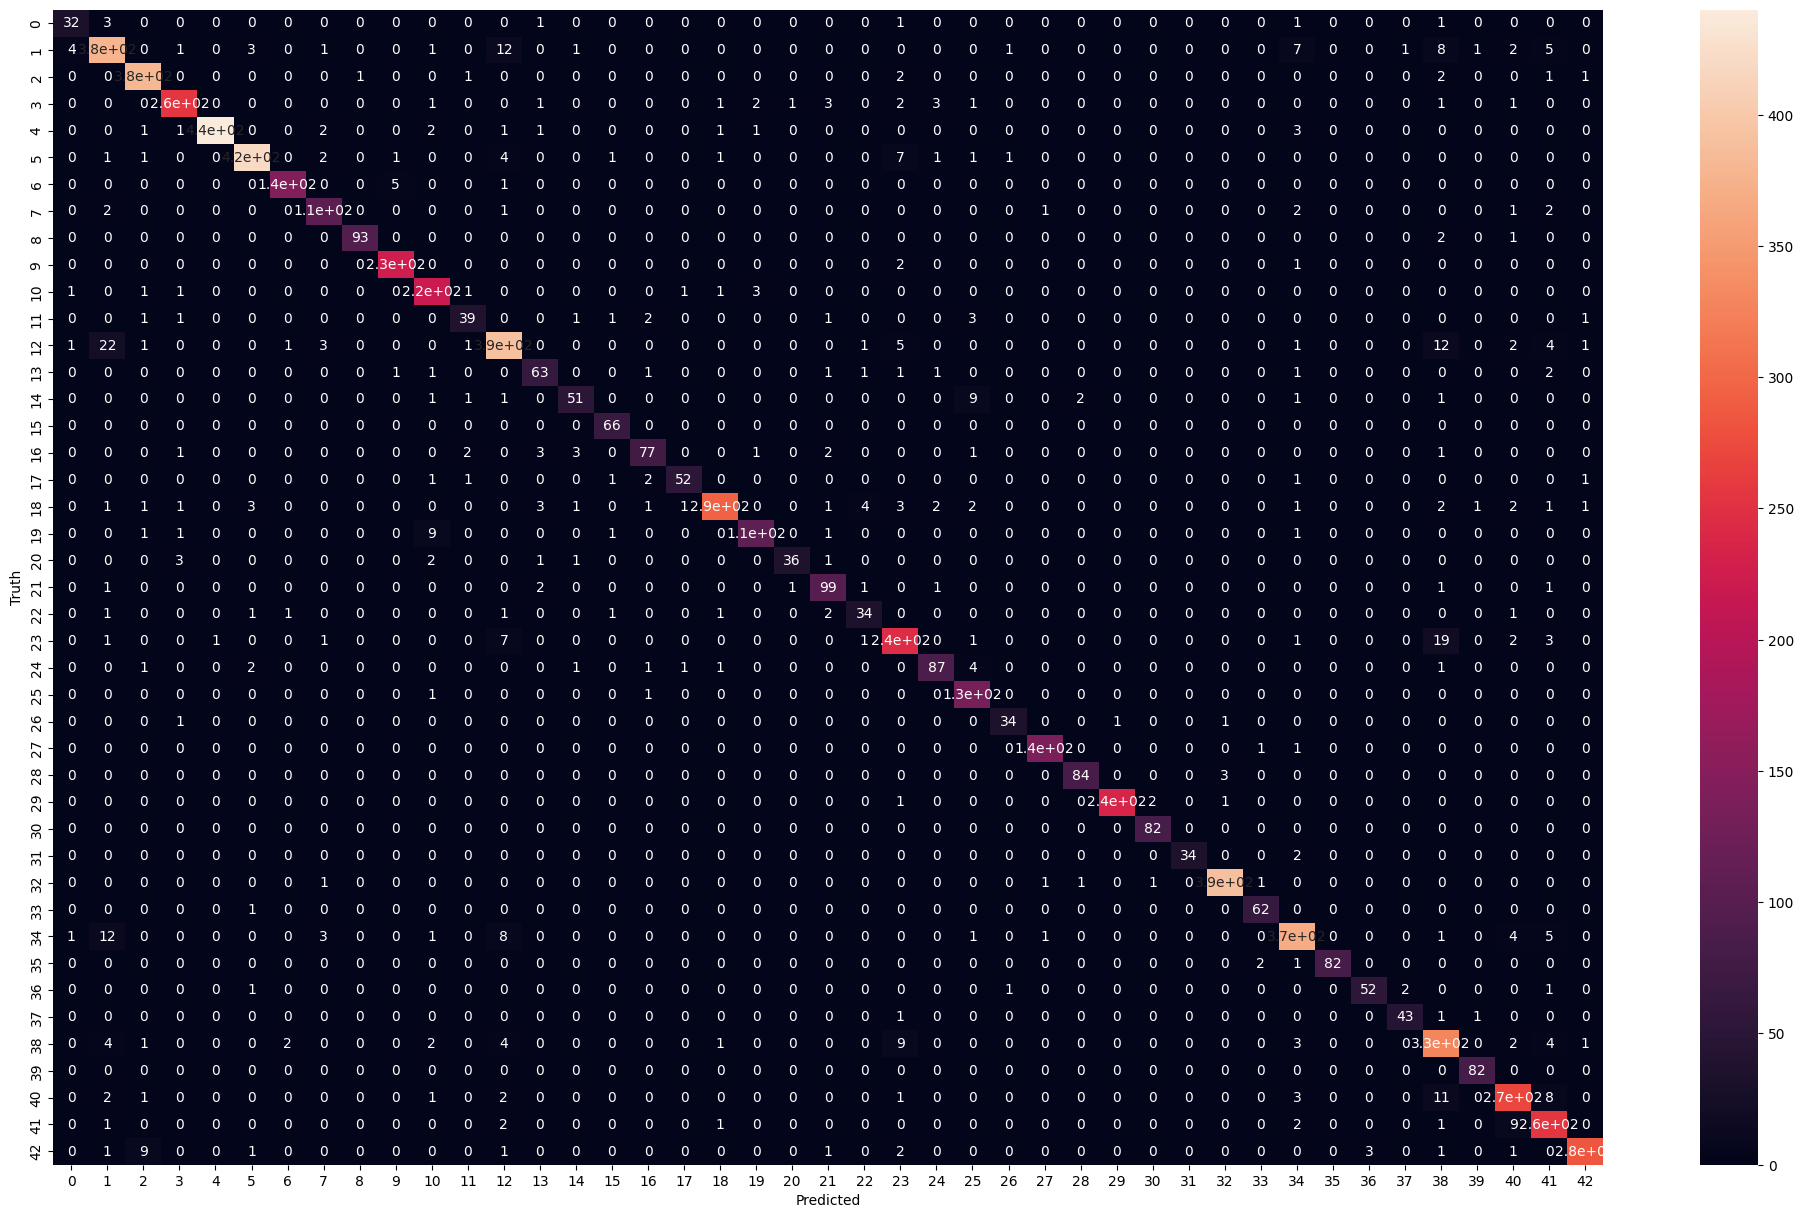

In [93]:
import seaborn as sn
plt.figure(figsize = (25,15))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
